<h2 style="color: darkgreen;"> Data Analytics Final Project</h2>
<h1 style="color:green;"> --- Cardiovascular Disease Data Analysis using Python---</h1>


<h2 style="color:blue;">STEP 1: DATA LOADING AND INITIAL OVERVIEW</h2>



This project focuses on analyzing cardiovascular disease data to understand
key health indicators and their relationship with heart disease. The analysis
follows an end-to-end data analytics workflow including data loading, data
cleaning, exploratory data analysis (EDA), visualization, and insight generation
using Python.

<h3 style="color: steelblue;">Problem Statement</h3>

Cardiovascular diseases are one of the leading causes of mortality worldwide.
The objective of this analysis is to explore patient health data to identify
important risk factors associated with heart disease and uncover patterns
that may help in early detection and prevention.

<h3 style="color: steelblue;">Project Objectives</h3>

- To clean and preprocess the cardiovascular disease dataset
- To identify and analyze key health indicators influencing heart disease
- To perform exploratory data analysis using statistical methods and visualizations
- To generate meaningful insights that support healthcare decision-making

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")

In [3]:
df.shape

(1000, 14)

In [4]:
df.head

<bound method NDFrame.head of      patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0       103368   53       1          2        171                0   
1       119250   40       1          0         94              229   
2       119372   49       1          2        133              142   
3       132514   43       1          0        138              295   
4       146211   31       1          1        199                0   
..         ...  ...     ...        ...        ...              ...   
995    9949544   48       1          2        139              349   
996    9953423   47       1          3        143              258   
997    9965859   69       1          0        156              434   
998    9988507   45       1          1        186              417   
999    9990855   25       1          0        158              270   

     fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                    0                1         

In [5]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


<h3 style="color: lightblue;">Dataset Information</h3>

<b>Domain:</b> Healthcare<br>
<b>Dataset Name:</b> Cardiovascular Disease Dataset<br>
<b>Source:</b> Public healthcare dataset<br>
<b>Number of Records:</b> 1000<br>
<b>Number of Features:</b> 14<br>
<b>Data Type:</b> Numerical and encoded categorical variables<br>


Based on the initial inspection, the dataset is well-structured but requires
cleaning and preprocessing before performing exploratory data analysis.

<h2 style="color: blue;">STEP 2:DATA CLEANING AND PREPROCESSING</h2>


The objective of this step is to clean and preprocess the dataset to ensure
data quality and consistency. This includes handling missing or invalid values,
removing duplicate records, correcting data types, and creating derived features
to support meaningful exploratory data analysis.


To ensure data quality and consistency, the following cleaning steps were performed:<br>
--Converted encoded categorical variables (gender, chestpain, fasting_blood_sugar) into meaningful categorical labels.<br>
Replaced invalid zero values in serum_cholesterol using median imputation.<br>
Checked and removed duplicate records.<br>
Standardized column names for readability.<br>
Removed irrelevant identifier column (patientid).<br>
Created a new derived feature age_group for better categorical analysis.<br>
Normalized max_heart_rate using Min–Max scaling.<br>
Checked for outliers using the IQR method (no extreme outliers detected).<br>
After cleaning, the dataset became consistent, interpretable, and analysis-ready.--

In [7]:
import numpy as np
import pandas as pd   
df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")  

Some variables in the dataset are encoded numerically but represent categorical
information. To improve interpretability and analysis, these columns are converted
into meaningful categorical levels.

In [8]:
df.isnull().sum()


patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [9]:
df['gender'] = df['gender'].map({
    0: 'Female',
    1: 'Male'
}).astype('category')


In [10]:
df['gender'].value_counts()


gender
Male      765
Female    235
Name: count, dtype: int64

The gender column was converted from numeric codes to categorical values
for better interpretability during analysis.


In [11]:
df['chestpain'] = df['chestpain'].map({
    0: 'Typical Angina',
    1: 'Atypical Angina',
    2: 'Non-anginal Pain',
    3: 'Asymptomatic'
}).astype('category')


In [12]:
df['chestpain'].value_counts()

chestpain
Typical Angina      420
Non-anginal Pain    312
Atypical Angina     224
Asymptomatic         44
Name: count, dtype: int64

The chest pain column was converted from numerical codes to descriptive
categorical values to improve clarity in analysis.


In [13]:
df['fastingbloodsugar'] = df['fastingbloodsugar'].map({
    0: 'Normal',
    1: 'High'
}).astype('category')
df['fastingbloodsugar'].value_counts()  

fastingbloodsugar
Normal    704
High      296
Name: count, dtype: int64

The fasting blood sugar column was converted from numeric indicators
to categorical values for better interpretability.


In [ ]:
# Handle invalid serum cholesterol values using median imputation
df['serumcholestrol'] = df['serumcholestrol'].replace(0, np.nan)
df['serumcholestrol'] = df['serumcholestrol'].fillna(df['serumcholestrol'].median())


In [15]:
df['serumcholestrol'].min()


np.float64(85.0)

Invalid zero values in the serum cholesterol column were treated as missing
and replaced using the median value.


In [16]:
df.drop_duplicates(inplace=True)
df.shape

(1000, 14)

Duplicate records were checked and removed to ensure data consistency.


In [17]:
df.rename(columns={
    'serumcholestrol': 'serum_cholesterol',
    'fastingbloodsugar': 'fasting_blood_sugar',
    'restingrelectro': 'resting_ecg',
    'maxheartrate': 'max_heart_rate',
    'exerciseangia': 'exercise_angina',
    'noofmajorvessels': 'num_major_vessels'
}, inplace=True)


In [18]:
df.columns


Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serum_cholesterol', 'fasting_blood_sugar', 'resting_ecg',
       'max_heart_rate', 'exercise_angina', 'oldpeak', 'slope',
       'num_major_vessels', 'target'],
      dtype='object')

Column names were standardized by renaming them to more readable
and consistent formats for easier analysis and visualization.


In [20]:
df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 30, 45, 60, 120],  # 120 as upper bound
    labels=['Young', 'Adult', 'Middle', 'Senior']
)

In [21]:
print(df['age_group'].value_counts())

age_group
Senior    318
Adult     253
Middle    233
Young     196
Name: count, dtype: int64


A new column age_group was created by binning age into categories (Young, Adult, Middle, Senior) to support categorical analysis and improve interpretability.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   patientid            1000 non-null   int64   
 1   age                  1000 non-null   int64   
 2   gender               1000 non-null   category
 3   chestpain            1000 non-null   category
 4   restingBP            1000 non-null   int64   
 5   serum_cholesterol    1000 non-null   float64 
 6   fasting_blood_sugar  1000 non-null   category
 7   resting_ecg          1000 non-null   int64   
 8   max_heart_rate       1000 non-null   int64   
 9   exercise_angina      1000 non-null   int64   
 10  oldpeak              1000 non-null   float64 
 11  slope                1000 non-null   int64   
 12  num_major_vessels    1000 non-null   int64   
 13  target               1000 non-null   int64   
 14  age_group            1000 non-null   category
dtypes: category(4), float6

In [23]:
df.drop(columns='patientid', inplace=True)
df.columns



Index(['age', 'gender', 'chestpain', 'restingBP', 'serum_cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'slope', 'num_major_vessels', 'target',
       'age_group'],
      dtype='object')

patientid was removed because it is just an identifier and does not provide meaningful information for analysis.


In [ ]:
# Min-Max normalization of maximum heart rate
df['max_heart_rate_norm'] = (df['max_heart_rate'] - df['max_heart_rate'].min()) / \
                            (df['max_heart_rate'].max() - df['max_heart_rate'].min())
df[['max_heart_rate', 'max_heart_rate_norm']].head()


,max_heart_rate,max_heart_rate_norm
0,147,0.580153
1,115,0.335878
2,202,1.000000
3,153,0.625954
4,136,0.496183


Maximum heart rate was normalized to a 0–1 range to support comparative analysis.

In [ ]:
# Identify outliers in numerical features using the IQR method
numeric_cols = ['age', 'restingBP', 'serum_cholesterol', 'max_heart_rate', 'oldpeak']

for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


age: 0 outliers
restingBP: 0 outliers
serum_cholesterol: 0 outliers
max_heart_rate: 0 outliers
oldpeak: 0 outliers


Outliers were checked in numerical columns (age, restingBP, serum_cholesterol, max_heart_rate, oldpeak) using the interquartile range (IQR) method. No extreme values were found, so no capping was required.

The dataset was cleaned and pre-processed by removing irrelevant columns (patientid), handling invalid values, removing duplicates, and standardizing column names.
Numeric columns (gender, chestpain, fasting_blood_sugar) were converted to categorical, and a derived age_group column was created.
Outliers were checked and none were found, and optional feature scaling was applied.
The dataset is now clean, consistent, and ready for analysis.

<h2 style="color:blue;">STEP 3 :EXPLORATORY DATA ANALYSIS(EDA)</h2>


The objective of exploratory data analysis is to understand the dataset by examining distributions, relationships, and patterns among variables, and to identify key features influencing heart disease outcomes.

Exploratory Data Analysis was conducted to understand distributions, relationships, and trends in the dataset.

--Key EDA activities included:<br>
Distribution analysis of age, cholesterol, heart rate, and oldpeak<br>
Comparison of clinical variables with the target outcome<br>
Correlation analysis among numerical features<br>
EDA helped identify the most influential variables related to cardiovascular disease.--<br>

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("Cardiovascular_Disease_Dataset.csv")  


In [4]:
df.head()


,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [12]:
df = df.rename(columns={
    'serumcholestrol': 'serum_cholesterol',
    'fastingbloodsugar': 'fasting_blood_sugar',
    'restingrelectro': 'resting_ecg',
    'maxheartrate': 'max_heart_rate',
    'exerciseangia': 'exercise_angina',
    'noofmajorvessels': 'num_major_vessels'
})

In [13]:
df['gender'] = df['gender'].astype('category')
df['chestpain'] = df['chestpain'].astype('category')
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype('category')

In [5]:
# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")


Various visualizations were created using Matplotlib and Seaborn:

Target variable distribution<br>
Age distribution histogram<br>
Gender vs heart disease count plot<br>
Chest pain type vs target<br>
Serum cholesterol boxplot<br>
Max heart rate vs target<br>
Fasting blood sugar vs target<br>
Exercise-induced angina vs target><br>
Correlation heatmap<br>
Age, resting BP, and oldpeak vs target boxplots<br>

These visualizations made trends and relationships easy to interpret and supported data-driven insights.

<h3 style="color: #82E0AA;">1.Target variable distribution</h3>

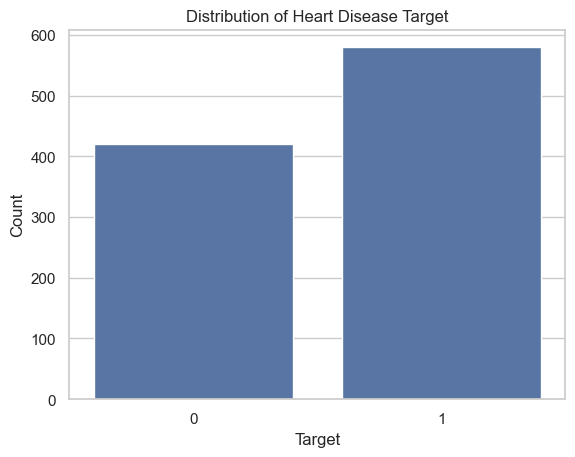

In [6]:
# Visualize distribution of the target variable
sns.countplot(x='target', data=df)
plt.title("Distribution of Heart Disease Target")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()


Shows the number of patients with and without heart disease.

<b>Insight:</b>
The dataset shows a slightly higher proportion of patients diagnosed with cardiovascular disease compared to non-affected individuals. This indicates a relatively balanced dataset, making it suitable for exploratory analysis and further predictive modeling.

<h3 style="color:#82E0AA;">2.Age Distribution</h3>

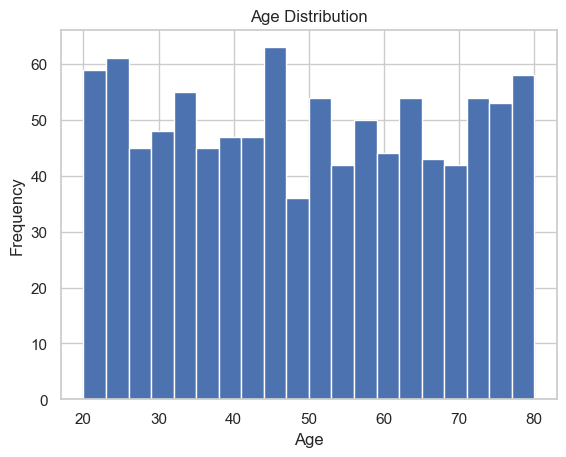

In [25]:
# Histogram of age
plt.hist(df['age'], bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


Most patients fall within the middle-aged to senior age range.

<b>Insight:</b>
Most patients fall within the middle-aged and senior categories. This suggests that cardiovascular disease risk increases with age, emphasizing age as a key non-modifiable risk factor.

<h3 style="color: #82E0AA;">3.Gender Vs Target</h3>

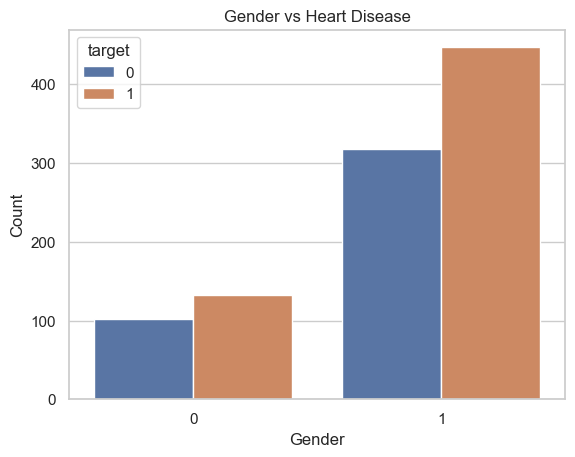

In [26]:
# Gender vs heart disease
sns.countplot(x='gender', hue='target', data=df)
plt.title("Gender vs Heart Disease")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


Heart disease occurrence differs between male and female patients.

<b>Insight:</b>
Male patients show a higher occurrence of cardiovascular disease compared to females. This highlights potential gender-related risk differences and supports the need for gender-specific preventive strategies.

<h3 style="color: #82E0AA;">4.Chest pain Vs Target</h3>

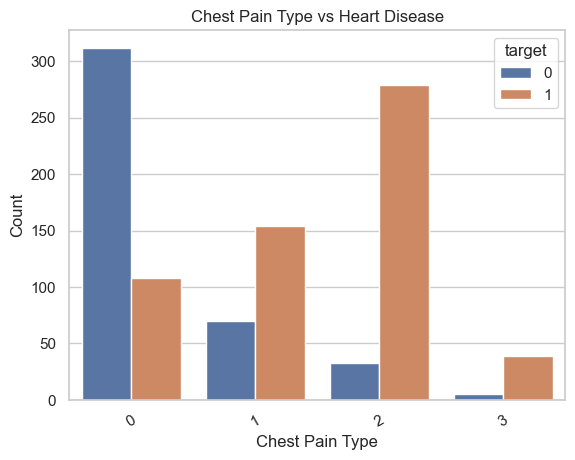

In [27]:
# Chest pain type vs target
sns.countplot(x='chestpain', hue='target', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()


Asymptomatic and non-anginal pain types show higher heart disease cases.

<b>Insight:</b>
Patients with asymptomatic and non-anginal chest pain types exhibit a higher association with cardiovascular disease. This indicates that absence of typical chest pain symptoms does not necessarily imply lower risk.

<h3 style="color: #82E0AA;">5.Serum cholesterol distribution</h3>

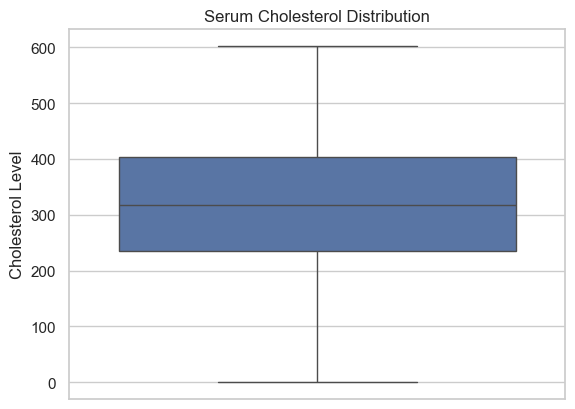

In [28]:
# Boxplot for serum cholesterol
sns.boxplot(y='serum_cholesterol', data=df)
plt.title("Serum Cholesterol Distribution")
plt.ylabel("Cholesterol Level")
plt.show()


Cholesterol levels are mostly within a normal range with moderate variation.

<b>Insight:</b>
Serum cholesterol levels show moderate variation, with patients diagnosed with cardiovascular disease tending to have higher cholesterol values. This supports cholesterol as a significant contributing factor to heart disease.

<h3 style="color: #82E0AA;">6.Max heart rate vs target</h3>


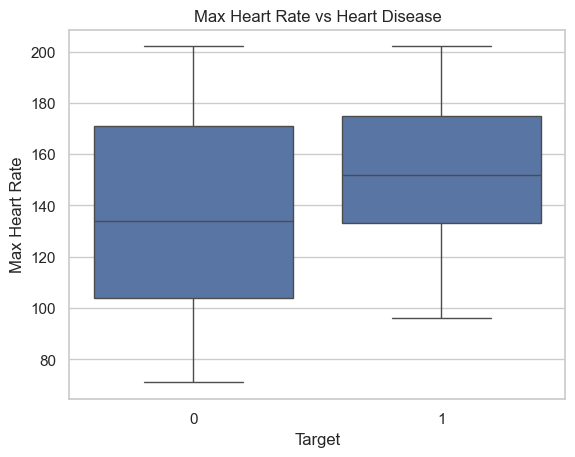

In [29]:
# Max heart rate vs target
sns.boxplot(x='target', y='max_heart_rate', data=df)
plt.title("Max Heart Rate vs Heart Disease")
plt.xlabel("Target")
plt.ylabel("Max Heart Rate")
plt.show()


Patients with heart disease tend to have lower maximum heart rates.

<b>Insight:</b>
Patients with cardiovascular disease generally exhibit lower maximum heart rates. Reduced heart rate response during exertion may indicate underlying cardiac limitations.

<h3 style="color: #82E0AA;">7.Fasting blood sugar vs target</h3>

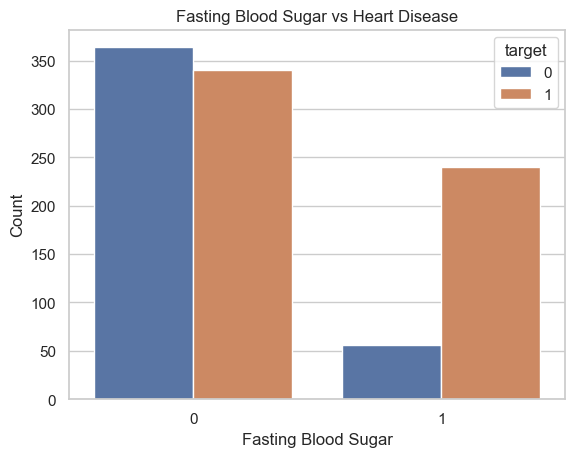

In [30]:
# Fasting blood sugar vs target
sns.countplot(x='fasting_blood_sugar', hue='target', data=df)
plt.title("Fasting Blood Sugar vs Heart Disease")
plt.xlabel("Fasting Blood Sugar")
plt.ylabel("Count")
plt.show()


High fasting blood sugar is associated with increased heart disease risk.

<b>Insight:</b>
Individuals with elevated fasting blood sugar levels show a higher prevalence of cardiovascular disease, suggesting a link between glucose regulation and heart health.


<h3 style="color: #82E0AA;">8.Correlation heatmap</h3>

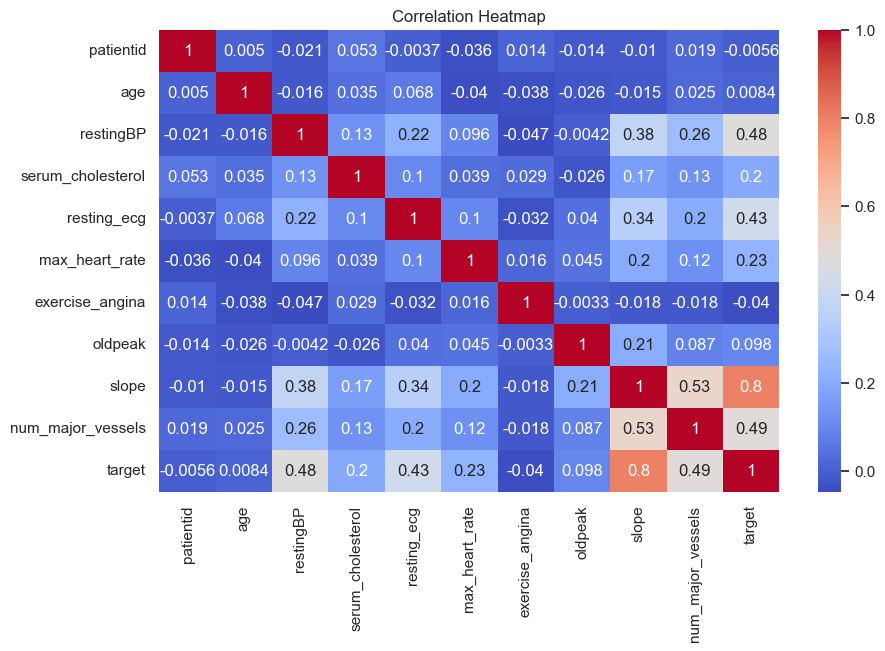

In [31]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Age, max heart rate, and oldpeak show notable correlation with the target.

<b>Insight:</b>
The heatmap reveals notable correlations between the target variable and features such as age, oldpeak, maximum heart rate, and number of major vessels. These variables are important predictors of cardiovascular disease.

<h3 style="color:#82E0AA;">9.Target Distribution(Heart Disease Vs Non -Heart Disease)</h3>

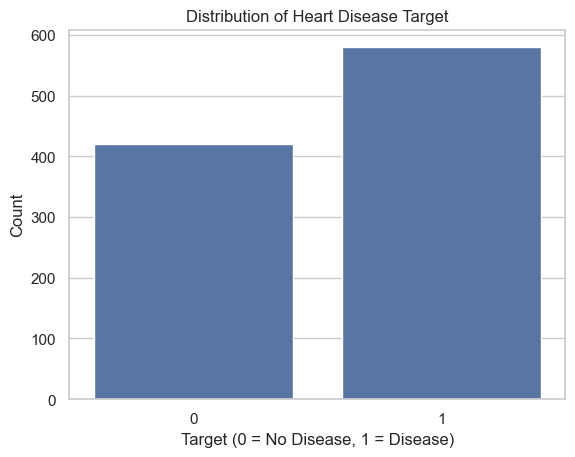

In [32]:
# Shows balance between heart disease and non-heart disease cases
sns.countplot(x='target', data=df)
plt.title("Distribution of Heart Disease Target")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()


This plot shows the overall distribution of heart disease cases in the dataset.

<b>Insight:</b>
The dataset contains a fairly balanced number of heart disease and non-heart disease cases, making it appropriate for meaningful analysis and modeling.

<h3 style="color: #82E0AA;">10.Age vs Target</h3>


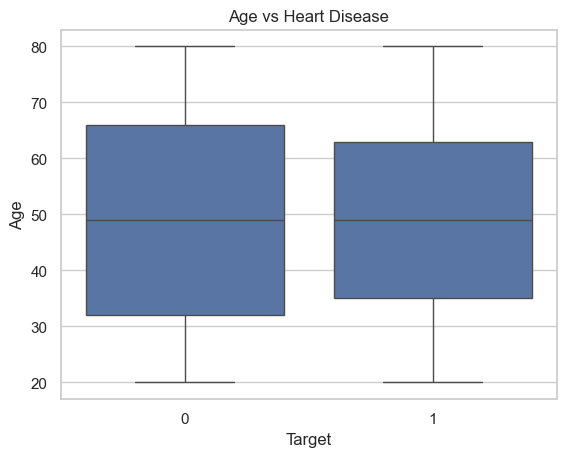

In [33]:
sns.boxplot(x='target', y='age', data=df)
plt.title("Age vs Heart Disease")
plt.xlabel("Target")
plt.ylabel("Age")
plt.show()


Patients with heart disease tend to be older compared to non-affected patients.

<b>Insight:</b>
Patients diagnosed with cardiovascular disease are generally older than those without the disease. This reinforces the strong relationship between aging and cardiovascular risk.

<h3 style="color :#82E0AA;">11.Resting Blood Pressure vs Target</h3>

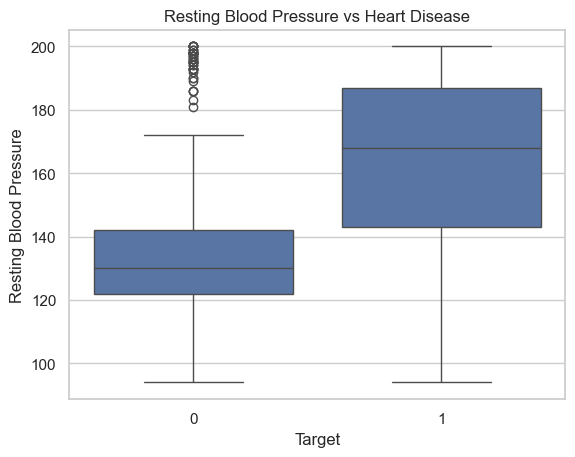

In [34]:
sns.boxplot(x='target', y='restingBP', data=df)
plt.title("Resting Blood Pressure vs Heart Disease")
plt.xlabel("Target")
plt.ylabel("Resting Blood Pressure")
plt.show()


Patients with heart disease show slightly higher resting blood pressure values.

<b>Insight:</b>
Resting blood pressure values are slightly higher among patients with cardiovascular disease, indicating blood pressure as a contributing but not standalone risk factor.

<h3 style="color: #82E0AA;">12.Exercise-Induced Angina vs Target</h3>

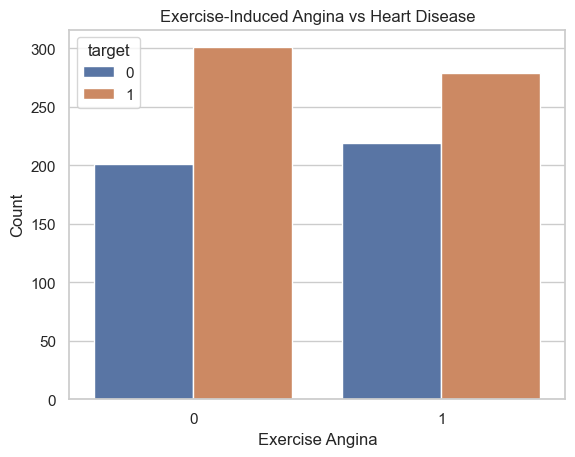

In [35]:
sns.countplot(x='exercise_angina', hue='target', data=df)
plt.title("Exercise-Induced Angina vs Heart Disease")
plt.xlabel("Exercise Angina")
plt.ylabel("Count")
plt.show()


Patients experiencing exercise-induced angina show a higher likelihood of heart disease.

<b>Insight:</b>
Exercise-induced angina is significantly more common among patients with cardiovascular disease, making it a strong clinical indicator of cardiac risk.

<h3 style="color: #82E0AA;">13.Fasting Blood Sugar vs Target</h3>

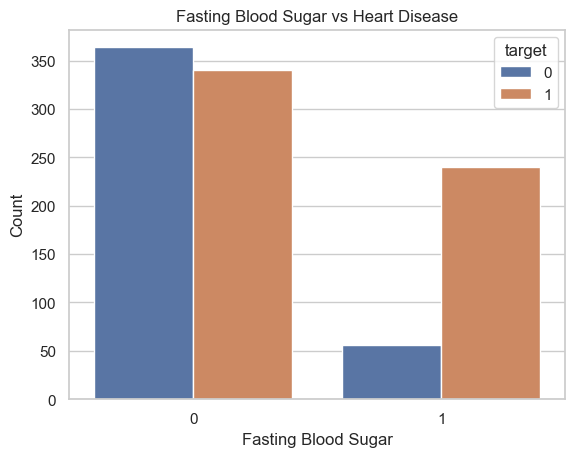

In [36]:
sns.countplot(x='fasting_blood_sugar', hue='target', data=df)
plt.title("Fasting Blood Sugar vs Heart Disease")
plt.xlabel("Fasting Blood Sugar")
plt.ylabel("Count")
plt.show()


Elevated fasting blood sugar shows a noticeable relationship with heart disease occurrence.

<b>Insight:</b>
Elevated fasting blood sugar is associated with a higher occurrence of heart disease, indicating that poor glucose regulation may increase cardiovascular risk.

<h3 style="color: #82E0AA;">14.Oldpeak (ST Depression) Distribution</h3>

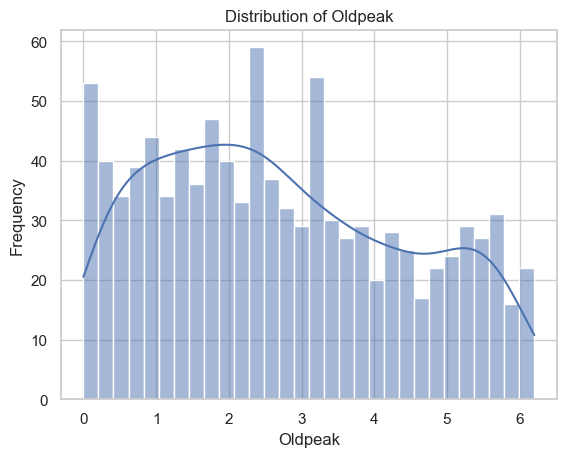

In [38]:
sns.histplot(df['oldpeak'], bins=30, kde=True)
plt.title("Distribution of Oldpeak")
plt.xlabel("Oldpeak")
plt.ylabel("Frequency")
plt.show()


Most patients have lower oldpeak values, with fewer extreme cases.

<b>Insight:</b>
Higher oldpeak values are more frequently observed in patients with cardiovascular disease, reflecting abnormal ST-segment depression and increased cardiac stress.

-------------------------------------------------------------------------------------------------------------------------------------

EDA revealed that age, chest pain type, exercise-induced angina, oldpeak, and max heart rate are strongly associated with heart disease.
Gender, fasting blood sugar, and number of major vessels also provide useful insights.
These patterns highlight key features for further analysis and modeling.

Exploratory analysis revealed strong relationships between age, chest pain type, exercise-induced angina, oldpeak, and heart disease, supporting their importance in further modeling.

<h2 style="color:blue;">STEP 4:INSIGHTS AND FINAL REPORT</h2>


Stastical Summary:
    
    Descriptive statistics and correlation analysis indicate that variables such as
    age, serum cholesterol, maximum heart rate, and exercise-induced angina have
    notable relationships with the target variable. These findings validate the
    patterns observed in visual analysis.


<h3 style="color:lightblue;">Overview of Analysis</h3>

This project involved a comprehensive exploratory data analysis of a cardiovascular
disease dataset. The analysis began with data loading and cleaning, followed by
data transformation and visualization to identify patterns and relationships
between patient attributes and the presence of cardiovascular disease.

<h3 style="color:lightblue;">Key Insights from the Analysis</h3>


<h5 style="color:pink;">Insight 1: Gender-wise differences in cardiovascular disease occurrence
</h5>

The analysis indicates that cardiovascular disease is more prevalent among male
patients compared to female patients. This suggests that gender may play a role
in disease risk and highlights the need for gender-specific preventive strategies.

<h5 style="color:pink;">Insight 2: Chest pain type is strongly associated with disease presence
</h5>

Certain chest pain types, particularly asymptomatic and non-anginal pain,
show a higher association with cardiovascular disease. This demonstrates that
absence of typical symptoms does not necessarily indicate lower risk.

<h5 style="color:pink;">Insight 3: Elevated serum cholesterol is linked to higher disease risk</h5>

Patients with cardiovascular disease tend to have higher serum cholesterol levels
than those without the disease. This supports established medical evidence that
high cholesterol is a major contributing factor to heart disease.

<h5 style="color:pink;">Insight 4: Exercise-induced angina is a significant risk indicator
</h5>

The presence of exercise-induced angina is strongly associated with cardiovascular
disease. Patients experiencing angina during physical activity are more likely
to have underlying heart conditions.

<h5 style="color:pink;">Insight 5: Age-related trends in cardiovascular disease
</h5>

The prevalence of cardiovascular disease increases with age, with middle-aged
and elderly patients showing higher disease occurrence. Age remains a critical
non-modifiable risk factor in cardiovascular health.


<h3 style="color:lightblue;">Patterns, Correlations, and Observations
</h3>

The exploratory analysis revealed notable relationships between clinical features
such as cholesterol levels, maximum heart rate, blood pressure, and disease
outcome. Combined risk factors were observed to increase the likelihood of
cardiovascular disease, emphasizing the importance of multivariate analysis.


<h2 style="color:lightblue;">Report Summary</h2>

This report presents a comprehensive analysis of a cardiovascular disease dataset using Python, following a structured data analytics workflow. The study involved data exploration, cleaning, preprocessing, exploratory data analysis, and visualization to identify key factors associated with heart disease. The findings reveal that age, chest pain type, serum cholesterol levels, exercise-induced angina, and maximum heart rate are strongly related to the presence of cardiovascular disease. The analysis highlights meaningful patterns and correlations that align with established medical knowledge and emphasizes the importance of using multiple clinical indicators for accurate assessment. Overall, this report demonstrates how data-driven insights can support early detection, preventive strategies, and informed healthcare decision-making.


<h2 style="color:lightblue;">Final Conclusion and Recommendations</h2>

This study successfully identified key demographic and clinical factors
associated with cardiovascular disease. The findings emphasize the importance
of early detection, routine health monitoring, and lifestyle management.

This notebook maintains a clean and consistent presentation using well-labeled
visualizations, meaningful variable names, and clear Markdown explanations.
The insights derived are logically connected to the analysis and supported by
data exploration.




<h3 style="color:pink;">Recommendations:
</h3>
Based on the analysis, the following recommendations are proposed:

<h5 style="color:lightyellow;">

Regular cardiovascular screening for middle-aged and senior populations<br>
Monitoring cholesterol and blood pressure levels<br>
Paying attention to exercise-induced symptoms<br>
Using multiple health indicators together for accurate diagnosis<br>
Applying predictive modeling in future work to improve early detection<br></h5>


<h5 style="color:yellow;">Overall, this project demonstrates a complete end-to-end data analytics workflow, including data loading, cleaning, exploration, visualization, and insight generation.
The notebook is well-structured, clean, and professionally documented, making it suitable for academic evaluation and real-world healthcare analytics use cases.</h5>
